In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("used_cars.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [4]:
df.head(
)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [6]:
df.shape

(4009, 12)

In [7]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [8]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [9]:
df["fuel_type"].fillna("not supported",inplace=True)
df["fuel_type"].replace({"–":"not supported"},inplace=True)

In [10]:
df["clean_title"].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [11]:
df["clean_title"].fillna('No',inplace=True)
df["clean_title"].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

In [12]:
df["accident"].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [13]:
mode_value = df["accident"].mode()[0]
df["accident"].fillna(value=mode_value,inplace=True)
df["accident"].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [14]:
df["milage"] = df["milage"].astype(str)
df["milage"] = df["milage"].str.replace(" mi.","")
df["milage"] = df["milage"].str.replace(",","")
df["milage"] = df["milage"].astype(float)
df["milage"]

0       51000.0
1       34742.0
2       22372.0
3       88900.0
4        9835.0
         ...   
4004      714.0
4005    10900.0
4006     2116.0
4007    33000.0
4008    43000.0
Name: milage, Length: 4009, dtype: float64

In [15]:
df["price"] = df["price"].astype(str)
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")
df["price"] = df["price"].astype(float)
df["price"]

0        10300.0
1        38005.0
2        54598.0
3        15500.0
4        34999.0
          ...   
4004    349950.0
4005     53900.0
4006     90998.0
4007     62999.0
4008     40000.0
Name: price, Length: 4009, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [17]:
import datetime
now_date = datetime.datetime.now()
df["Age"] = now_date.year - df["model_year"]
df["Age"]= df["Age"] + 1


In [18]:
df["Age"].value_counts()

Age
4     354
5     350
6     322
8     315
7     297
10    268
9     259
11    228
3     226
12    181
13    158
14    141
15    124
18    113
16    100
19     98
21     72
17     72
20     66
22     60
23     49
25     34
24     32
26     17
27     15
28     11
29      9
33      9
30      8
32      7
2       6
31      6
52      1
34      1
Name: count, dtype: int64

In [19]:
df.drop("model_year",axis=1,inplace=True)

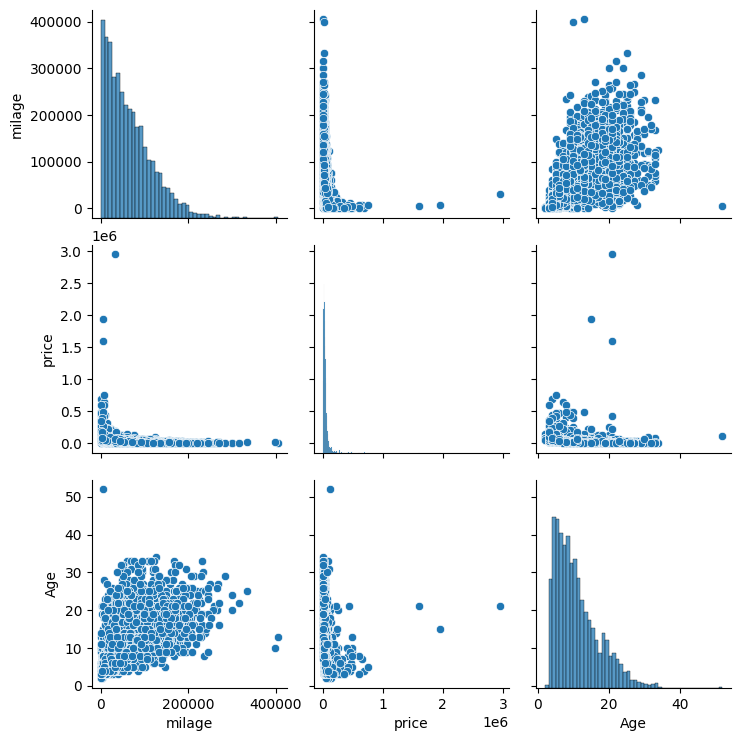

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
df['price'] = np.log10(df['price'])

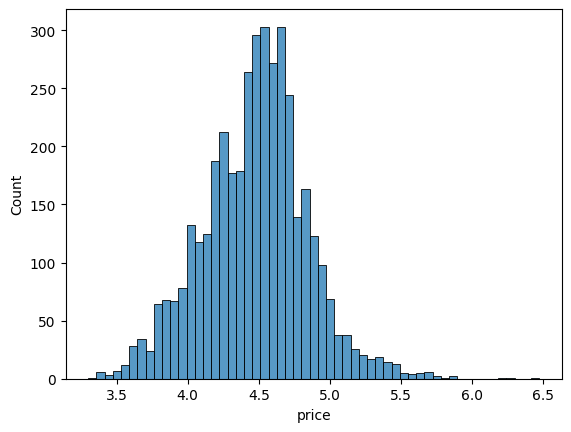

In [22]:
sns.histplot(df['price'])
plt.show()

In [23]:
df["model"].value_counts()

model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
                           ..
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, Length: 1898, dtype: int64

In [24]:
df["transmission"].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [25]:
transmission_mapping = {
    '6-Speed A/T': 'Automatic',
    '8-Speed Automatic': 'Automatic',
    'Automatic': 'Automatic',
    '7-Speed A/T': 'Automatic',
    'A/T': 'Automatic',
    '8-Speed A/T': 'Automatic',
    'Transmission w/Dual Shift Mode': 'Automatic',
    '9-Speed Automatic': 'Automatic',
    '10-Speed Automatic': 'Automatic',
    'Automatic CVT': 'CVT',
    'CVT Transmission': 'CVT',
    'CVT-F': 'CVT',
    '7-Speed Automatic': 'Automatic',
    '6-Speed M/T': 'Manual',
    '7-Speed M/T': 'Manual',
    '6-Speed Manual': 'Manual',
    '5-Speed M/T': 'Manual',
    'Manual': 'Manual',
    '7-Speed Manual': 'Manual',
    '8-Speed Manual': 'Manual',
    'M/T': 'Manual',
    '6-Speed Automatic with Auto-Shift': 'Automatic',
    '8-Speed Automatic with Auto-Shift': 'Automatic',
    '9-Speed Automatic with Auto-Shift': 'Automatic',
    '5-Speed Automatic': 'Automatic',
    '4-Speed A/T': 'Automatic',
    '4-Speed Automatic': 'Automatic',
    '10-Speed A/T': 'Automatic',
    '5-Speed A/T': 'Automatic',
    '1-Speed A/T': 'Automatic',
    '2-Speed Automatic': 'Automatic',
    '6-Speed Electronically Controlled Automatic with O': 'Automatic',
    'Single-Speed Fixed Gear': 'Automatic',
    '7-Speed DCT Automatic': 'Automatic',
    '8-SPEED AT': 'Automatic',
    '8-SPEED A/T': 'Automatic',
    '10-Speed Automatic with Overdrive': 'Automatic',
    'Automatic, 9-Spd 9G-Tronic': 'Automatic',
    'Automatic, 8-Spd': 'Automatic',
    'Automatic, 8-Spd Sport w/Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd PDK Dual-Clutch': 'Automatic',
    'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Manual Modes': 'Automatic',
    'Automatic, 8-Spd Dual-Clutch': 'Automatic',
    '2-Speed A/T': 'Automatic',
    '6 Speed At/Mt': 'Manual',
    '6 Speed Mt': 'Manual',
    'Variable': 'Other',
    '2': 'Other',
     '–': 'Other',
    'SCHEDULED FOR OR IN PRODUCTION': 'Other'
}


df['transmission'] = df['transmission'].replace(transmission_mapping)

df['transmission'].value_counts()


transmission
Automatic                                3324
Manual                                    372
CVT                                       100
9-Speed A/T                                74
6-Speed Automatic                          73
7-Speed Automatic with Auto-Shift          24
1-Speed Automatic                          14
Other                                      12
Transmission Overdrive Switch               7
F                                           2
Manual, 6-Spd                               2
Auto, 6-Spd w/CmdShft                       1
6-Speed                                     1
Automatic, 10-Spd                           1
7-Speed                                     1
Automatic, 7-Spd S tronic Dual-Clutch       1
Name: count, dtype: int64

In [26]:

def simplify_transmission(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    else:
        return 'Other'


df['transmission'] = df['transmission'].apply(simplify_transmission)


df['transmission'].value_counts()


transmission
Automatic    3437
Manual        374
Other         198
Name: count, dtype: int64

In [27]:
df["engine"].unique()

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', ...,
       '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel'], dtype=object)

In [28]:
df["engine"].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
323.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
405.0HP 4.2L 8 Cylinder Engine Gasoline Fuel              1
353.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel              1
420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel             1
Name: count, Length: 1146, dtype: int64

In [29]:
import re

def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''


df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [30]:
df.drop('engine',axis=1,inplace=True)

In [31]:
df['Horsepower'].isna().sum()

707

In [32]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Horsepower'].dtype

dtype('float64')

In [ ]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace = True)
df['Horsepower'].isnull().sum()

0

In [34]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')

In [35]:
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')

In [ ]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)
df['Engine_Displacement'].isnull().sum()

0

In [37]:
df.drop("model",axis=1,inplace=True)

In [38]:
df["ext_col"].value_counts()

ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64

In [39]:
df["ext_col"].unique()

array(['Black', 'Moonlight Cloud', 'Blue', 'Glacier White Metallic',
       'Silver', 'Green', 'Fuji White', 'Yellow', 'White', 'Gray',
       'Purple', 'Iconic Silver Metallic', 'Mythos Black Metallic', 'Red',
       'Gold', 'Lunar Silver Metallic', 'Mountain Air Metallic',
       'Caspian Blue', 'Tango Red Metallic', '–', 'Alpine White',
       'BLU ELEOS', 'Horizon Blue', 'Granite Crystal Clearcoat Metallic',
       'Orange', 'Beige', 'Rift Metallic', 'Atomic Silver',
       'Summit White', 'Imperial Blue Metallic',
       'Magnetic Gray Clearcoat', 'Bright White Clearcoat',
       'Typhoon Gray', 'Crystal Black Silica', 'Arctic Gray Metallic',
       'Selenite Grey Metallic', 'Ultra Black', 'Lunare White Metallic',
       'Hyper Red', 'Daytona Gray Pearl Effect', 'Vik Black',
       'Pacific Blue Metallic', 'Obsidian Black Metallic',
       'Silver Ice Metallic', 'Sonic Silver Metallic', 'Nightfall Mica',
       'Apex Blue', 'Go Mango!', 'Ingot Silver Metallic',
       'Midnight Bl

In [40]:
df['int_col'].value_counts()

int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64

In [41]:
df['int_col'].unique()

array(['Black', 'Gray', 'Ebony.', 'Green', 'Pimento / Ebony', 'Brown',
       'White', '–', 'Beige', 'Jet Black', 'Light Gray', 'Anthracite',
       'Red', 'Nero Ade', 'Blue', 'Charcoal', 'Rioja Red',
       'Canberra Beige/Black', 'Roast', 'Ivory / Ebony',
       'Silk Beige/Black', 'Medium Pewter', 'Ice', 'Black / Express Red',
       'Obsidian Black', 'Ebony', 'Orange', 'Caramel', 'Orchid',
       'Graphite', 'Tan/Ebony', 'Cappuccino', 'Nero', 'Sahara Tan',
       'BLACK', 'Hotspur', 'Blk', 'Black Onyx', 'Nougat Brown',
       'Titan Black', 'Oyster W/Contrast', 'Silver',
       'Macchiato Beige/Black', 'Sand Beige', 'Navy Pier', 'WHITE',
       'Parchment.', 'Sarder Brown', 'Grace White', 'Cloud', 'Espresso',
       'Mesa', 'Whisper Beige', 'Medium Dark Slate', 'Gold',
       'Camel Leather', 'Tupelo', 'Black/Red', 'Parchment', 'Beluga Hide',
       'Charles Blue', 'Global Black', 'Titan Black / Quarzit', 'Mocha',
       'Portland', 'Medium Light Camel', 'Black / Saddle', 'Ash',
  

In [42]:
def extract_base_colors(df):
    
    base_colors = [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
         'orange', 'yellow']
    
    # Convert columns to lowercase for consistency
    df['int_col'] = df['int_col'].str.lower()
    df['ext_col'] = df['ext_col'].str.lower()
    
    # Function to find base color or label it as 'other'
    def find_base_color(text):
        for color in base_colors:
            if color in text:
                return color
        return 'other'  # If no base color is found, return 'other'

    # Apply the function to both interior and exterior color columns
    df['int_col'] = df['int_col'].apply(find_base_color)
    df['ext_col'] = df['ext_col'].apply(find_base_color)
    return df


df = extract_base_colors(df)

df[['int_col', 'ext_col']].head()

,int_col,ext_col
0,black,black
1,gray,other
2,black,blue
3,black,black
4,black,white


In [43]:
df["int_col"].value_counts()

int_col
black     2155
other      862
gray       483
brown      163
red        134
white      131
blue        32
orange      23
silver      16
green        8
yellow       2
Name: count, dtype: int64

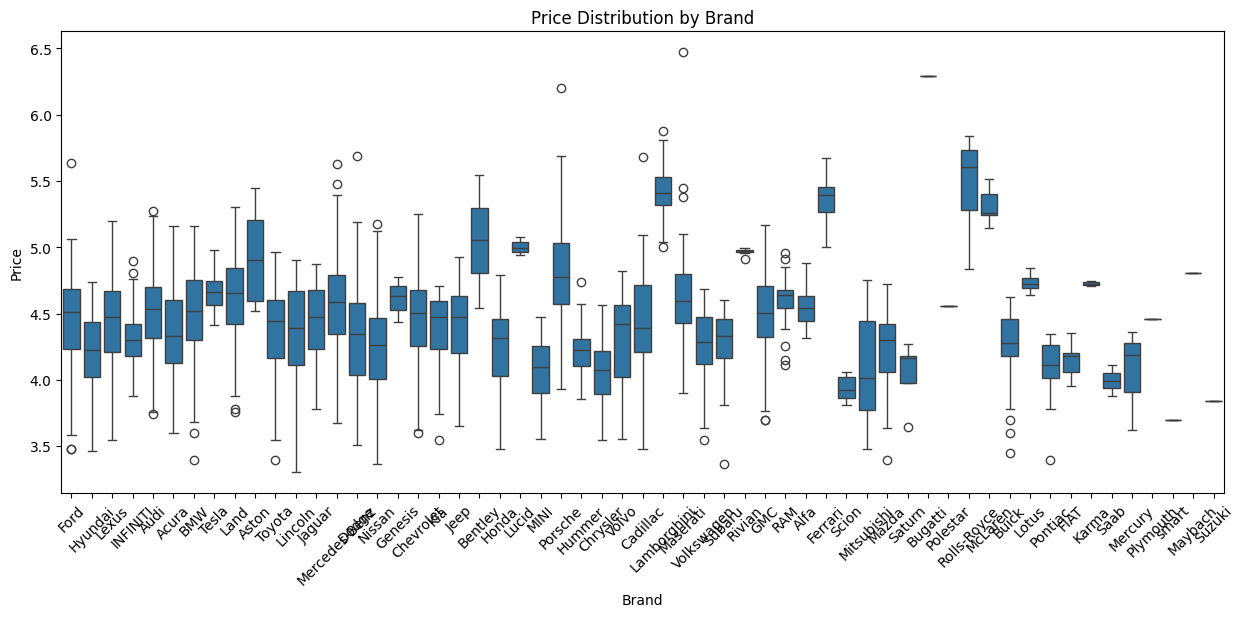

In [44]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df,x="brand",y="price")
plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

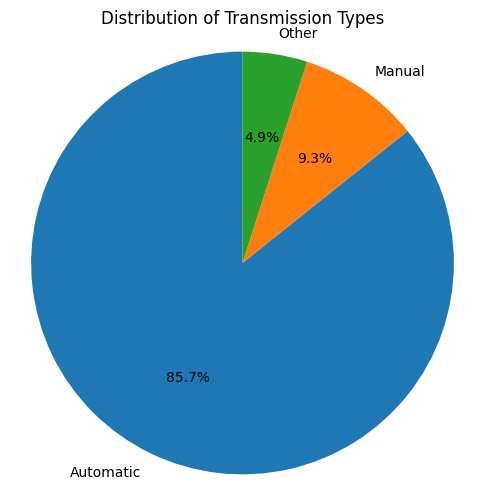

In [45]:
transmission_counts = df['transmission'].value_counts()
plt.figure(figsize=(6, 6))  
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types')
plt.axis('equal')
plt.show()

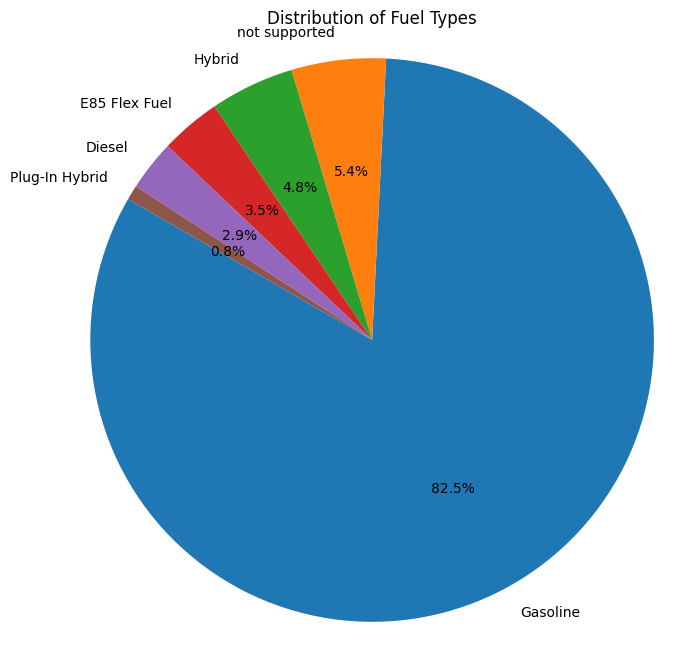

In [46]:
fueltype_counts =df["fuel_type"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fueltype_counts,labels=fueltype_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Distribution of Fuel Types')
plt.axis('equal')
plt.show()

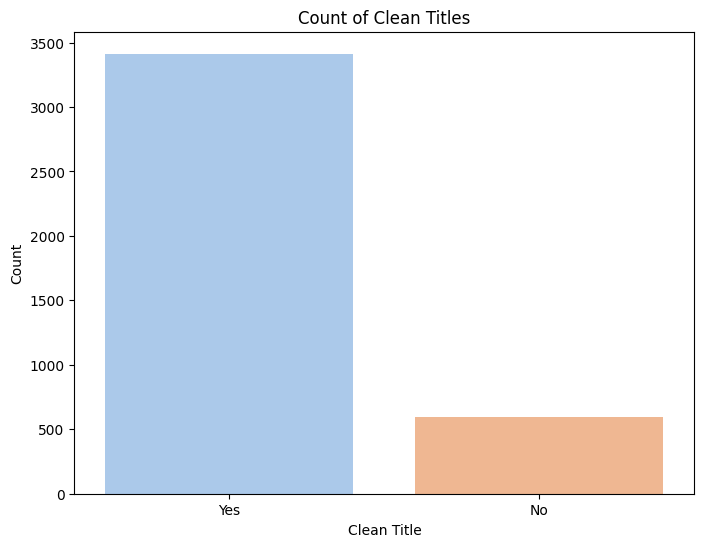

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='clean_title', palette=sns.color_palette("pastel"))
plt.title('Count of Clean Titles')
plt.xlabel('Clean Title')
plt.ylabel('Count')
plt.show()

In [48]:
brand_counts=df["brand"].value_counts()

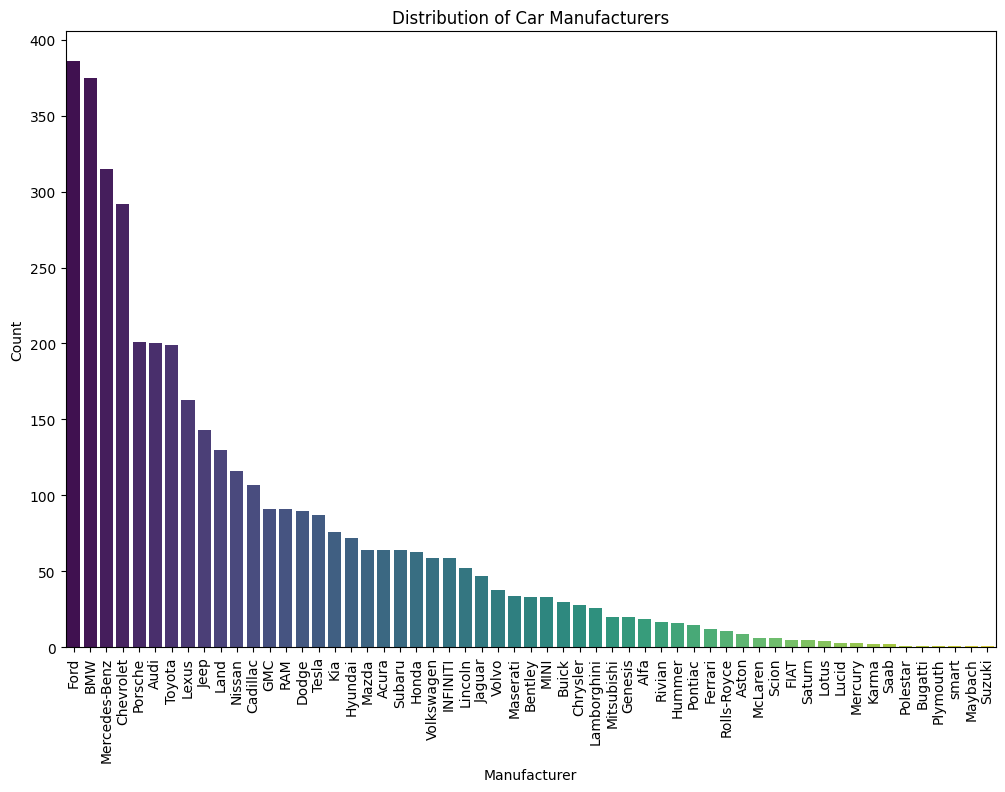

In [ ]:

plt.figure(figsize=(12, 8))
brand_counts=df["brand"].value_counts()
sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

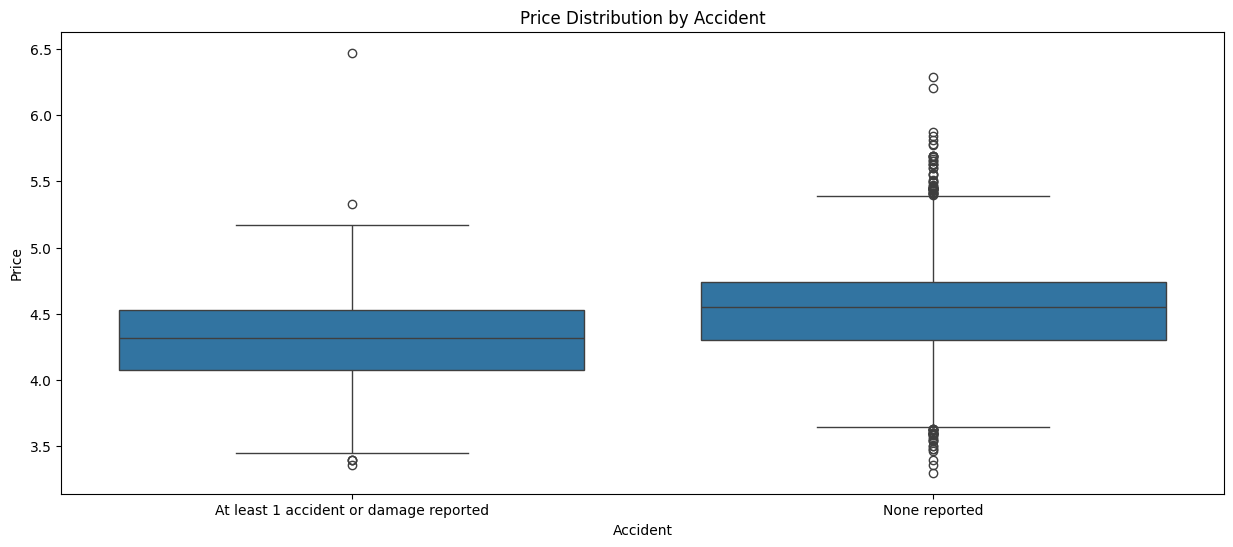

In [50]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df,x="accident",y="price")
plt.title("Price Distribution by Accident")
plt.xlabel("Accident")
plt.ylabel("Price")

plt.show()

In [51]:
df["Age"].unique()

array([13,  5,  4, 11, 10,  9, 25,  6,  7, 23,  8,  3, 26, 20, 15, 14, 19,
       12, 21, 17, 16, 22, 18, 29, 27, 33, 24, 28,  2, 30, 52, 34, 31, 32],
      dtype=int64)

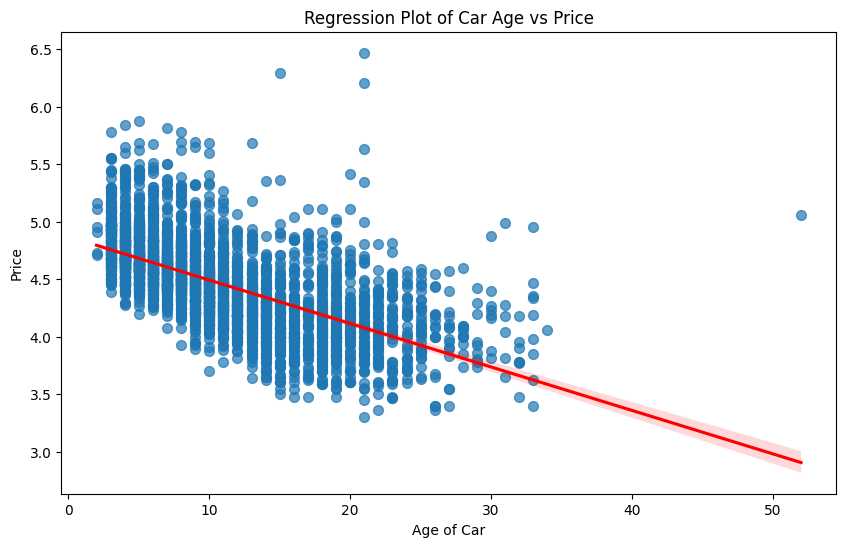

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='price', scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.title('Regression Plot of Car Age vs Price')
plt.xlabel('Age of Car')
plt.ylabel('Price')
plt.show()

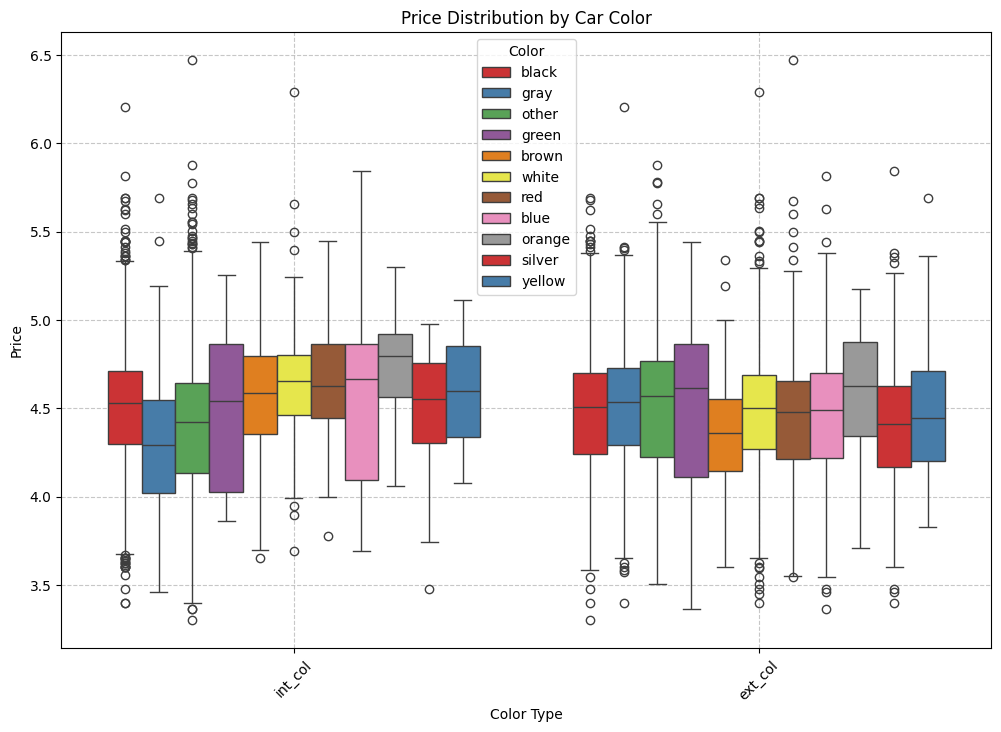

In [53]:
df_melted = df.melt(id_vars=['price'], value_vars=['int_col', 'ext_col'], var_name='color_type', value_name='color')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='color_type', y='price', hue='color', palette='Set1')

plt.title('Price Distribution by Car Color')
plt.xlabel('Color Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Color')
plt.show()


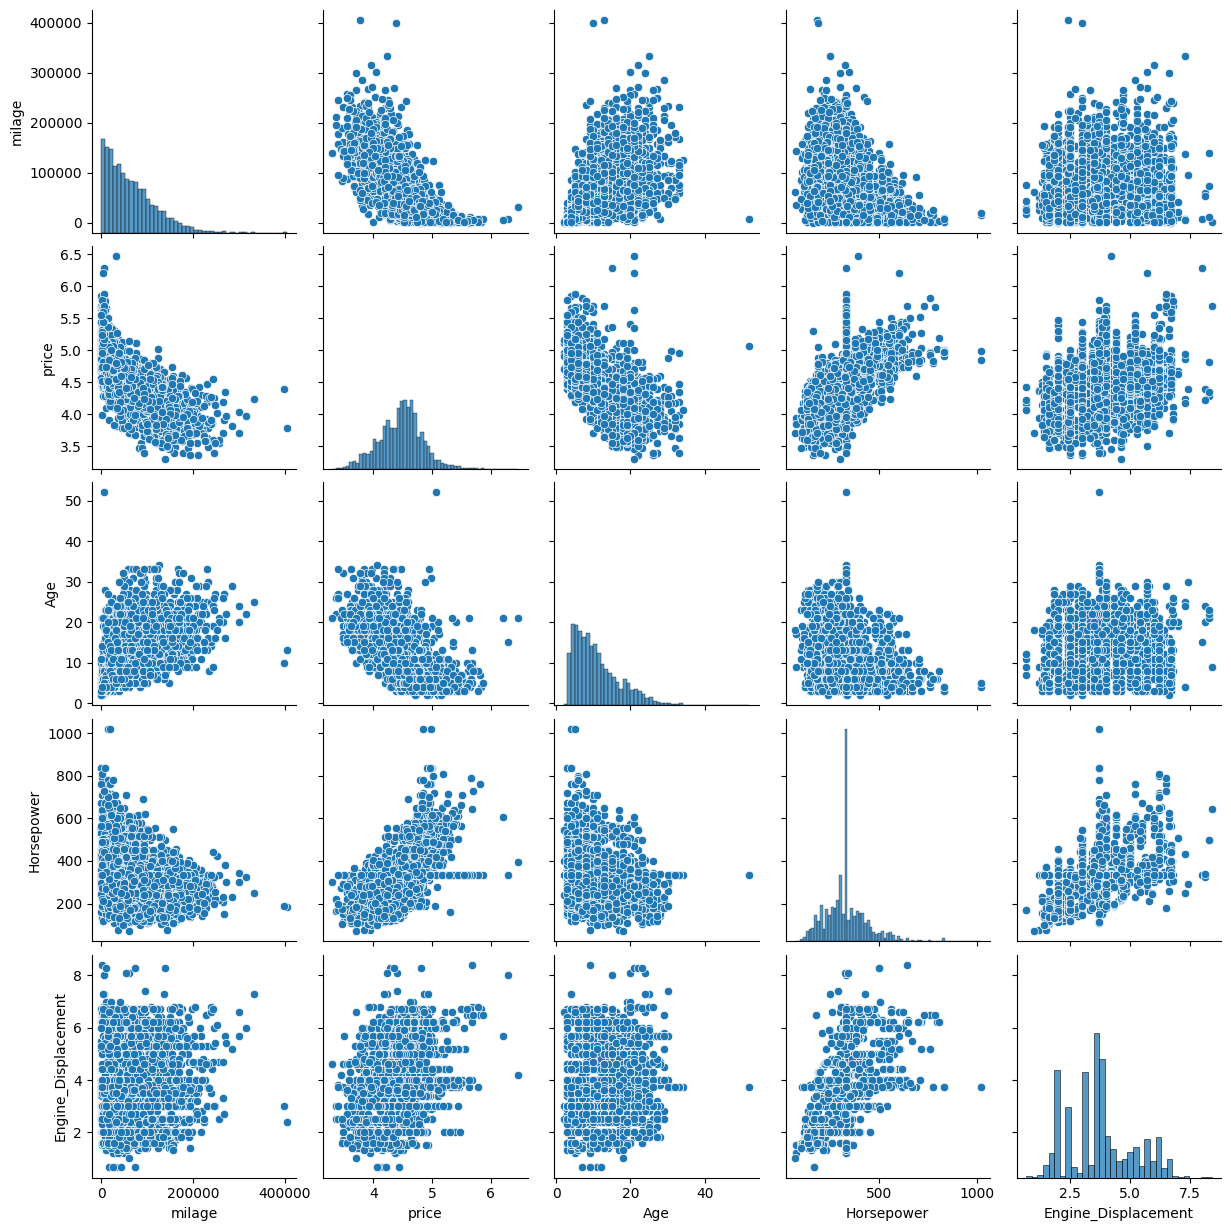

In [54]:
sns.pairplot(df)
plt.show()

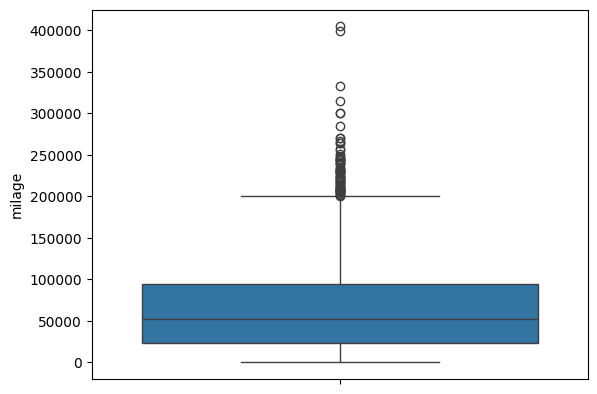

In [55]:
sns.boxplot(df["milage"])
plt.show()

In [56]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])


In [57]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

In [58]:
Q1 = df['milage'].quantile(0.25)
Q3 = df['milage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['milage'] = np.where(df['milage'] < lower_bound, lower_bound, df['milage'])
df['milage'] = np.where(df['milage'] > upper_bound, upper_bound, df['milage'])

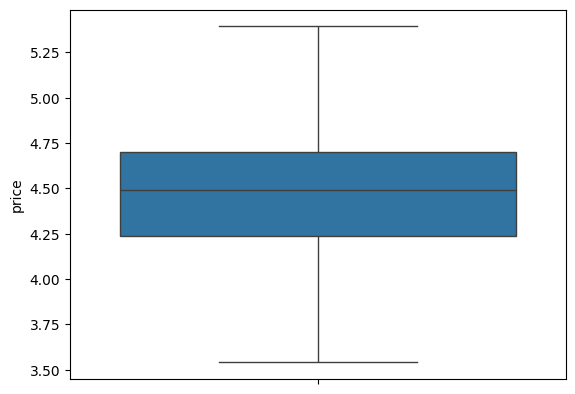

In [59]:
sns.boxplot(df["price"])
plt.show()

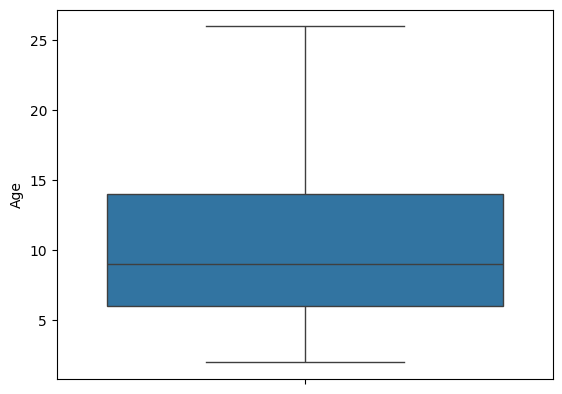

In [60]:
sns.boxplot(df["Age"])
plt.show()

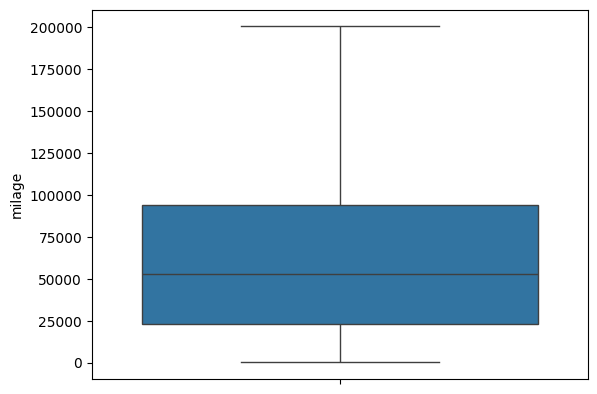

In [61]:
sns.boxplot(df["milage"])
plt.show()

In [62]:
Q1 = df['Horsepower'].quantile(0.25)
Q3 = df['Horsepower'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Horsepower'] = np.where(df['Horsepower'] < lower_bound, lower_bound, df['Horsepower'])
df['Horsepower'] = np.where(df['Horsepower'] > upper_bound, upper_bound, df['Horsepower'])

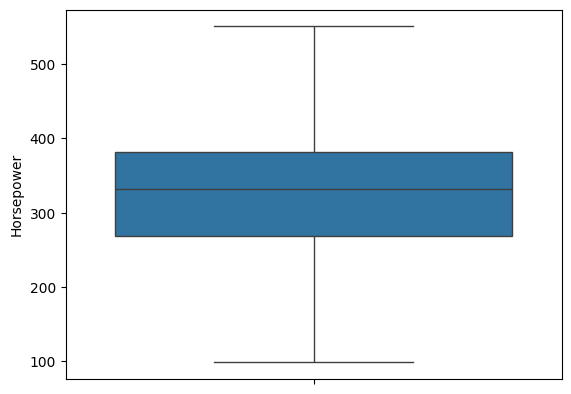

In [63]:
sns.boxplot(df["Horsepower"])
plt.show()

In [64]:
Q1 = df['Engine_Displacement'].quantile(0.25)
Q3 = df['Engine_Displacement'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] < lower_bound, lower_bound, df['Engine_Displacement'])
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] > upper_bound, upper_bound, df['Engine_Displacement'])

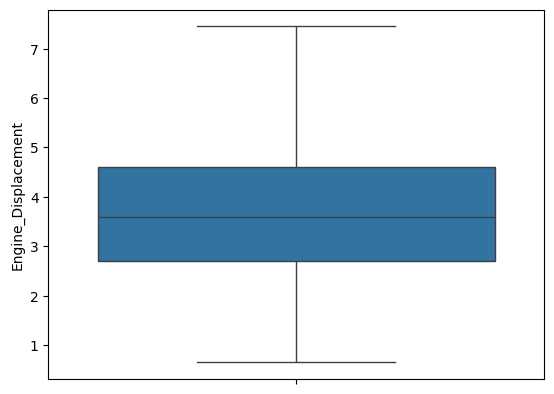

In [65]:
sns.boxplot(df["Engine_Displacement"])
plt.show()

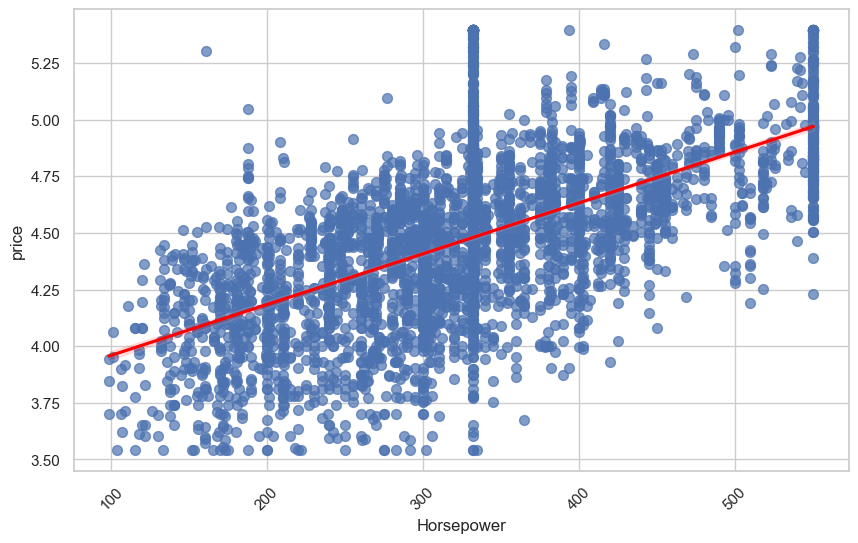

In [66]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Horsepower', y = 'price', data =df,scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.xticks(rotation=45)
plt.show()

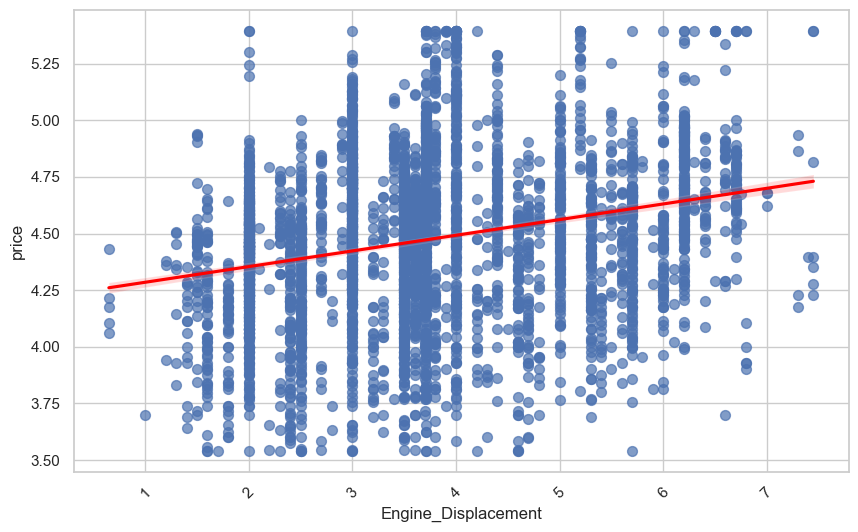

In [67]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Engine_Displacement', y = 'price', data =df,scatter_kws={'s':50, 'alpha':0.7}, line_kws={'color':'red'})
plt.xticks(rotation=45)
plt.show()

In [68]:
df.corr(numeric_only=True)

,milage,price,Age,Horsepower,Engine_Displacement
milage,1.000000,-0.729271,0.638573,-0.321750,0.050224
price,-0.729271,1.000000,-0.651029,0.608604,0.258752
Age,0.638573,-0.651029,1.000000,-0.271184,0.093969
Horsepower,-0.321750,0.608604,-0.271184,1.000000,0.568877
Engine_Displacement,0.050224,0.258752,0.093969,0.568877,1.000000


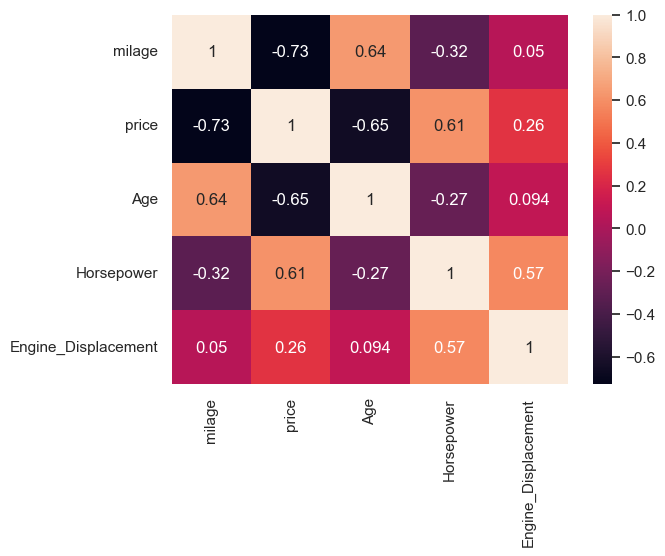

In [69]:

sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [70]:
df["transmission"] = df["transmission"].replace({'Automatic':1,
                                                'Manual':2,
                                                'Other':3})

In [71]:
df["accident"] = df["accident"].replace({'At least 1 accident or damage reported':1,"None reported":0}) 
df["accident"].value_counts()

accident
0    3023
1     986
Name: count, dtype: int64

In [72]:
df["clean_title"] = df["clean_title"].replace({"Yes":1,"No":0})
df["clean_title"].value_counts()

clean_title
1    3413
0     596
Name: count, dtype: int64

In [73]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [74]:
encoder = ce.BinaryEncoder(cols=['brand'])

In [75]:
df_binary_encoded = encoder.fit_transform(df)

In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
encoder = ce.BinaryEncoder(cols=['brand'])
df_binary_encoded = encoder.fit_transform(df)
le = LabelEncoder()
categorical_columns = ['fuel_type', 'ext_col', 'int_col']

for col in categorical_columns:
    df_binary_encoded[col] = le.fit_transform(df_binary_encoded[col])

In [77]:
df_binary_encoded.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,Horsepower,Engine_Displacement
0,0,0,0,0,0,1,51000.0,1,1,0,0,1,1,4.012837,13.0,300.000000,3.700000
1,0,0,0,0,1,0,34742.0,2,1,6,3,1,1,4.579841,5.0,332.283839,3.800000
2,0,0,0,0,1,1,22372.0,2,1,1,0,0,0,4.737177,4.0,332.283839,3.710836
3,0,0,0,1,0,0,88900.0,3,1,0,0,0,1,4.190332,11.0,354.000000,3.500000
4,0,0,0,1,0,1,9835.0,2,1,9,0,0,0,4.544056,5.0,332.283839,2.000000


In [78]:
x = df_binary_encoded.drop("price",axis=1)
y = df_binary_encoded["price"]
x.shape,y.shape

((4009, 16), (4009,))

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [80]:
x_train.shape

(2886, 16)

In [ ]:
x_valid.shape

(321, 16)

In [82]:
x_test.shape

(802, 16)

In [83]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_train)
x_valid_scaled = scale.transform(x_valid)
x_scaled[:5]

array([[-3.89994626e-01, -6.74267823e-01,  1.26121540e+00,
         1.07262370e+00,  9.92405827e-01, -1.19809976e+00,
        -3.22029473e-02, -1.50527317e-01, -3.71098509e-01,
        -1.22449177e+00,  1.26044117e+00,  1.76052033e+00,
        -2.40636411e+00, -4.13565830e-01,  2.49342123e-02,
        -2.12408617e-03],
       [-3.89994626e-01, -6.74267823e-01,  1.26121540e+00,
        -9.32293400e-01,  9.92405827e-01,  8.34655037e-01,
         4.99388044e-01, -1.50527317e-01, -3.71098509e-01,
        -1.22449177e+00, -8.13071970e-01, -5.68013891e-01,
         4.15564708e-01, -7.02461160e-02, -6.32748055e-01,
        -1.59053174e-01],
       [-3.89994626e-01, -6.74267823e-01, -7.92885976e-01,
         1.07262370e+00,  9.92405827e-01,  8.34655037e-01,
        -2.53007408e-02, -1.50527317e-01, -3.71098509e-01,
         1.21997440e+00,  1.26044117e+00, -5.68013891e-01,
         4.15564708e-01, -2.41905973e-01, -8.37366286e-01,
        -1.27553127e+00],
       [-3.89994626e-01, -6.74267823e

In [84]:
x_scaled = pd.DataFrame(x_scaled,columns=['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 
                'brand_5', 'milage', 'fuel_type', 'transmission', 
                'ext_col', 'int_col', 'accident', 'clean_title', 'Age',"Horsepower","Engine_Displacement"])
x_scaled.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Age,Horsepower,Engine_Displacement
0,-0.389995,-0.674268,1.261215,1.072624,0.992406,-1.198100,-0.032203,-0.150527,-0.371099,-1.224492,1.260441,1.760520,-2.406364,-0.413566,0.024934,-0.002124
1,-0.389995,-0.674268,1.261215,-0.932293,0.992406,0.834655,0.499388,-0.150527,-0.371099,-1.224492,-0.813072,-0.568014,0.415565,-0.070246,-0.632748,-0.159053
2,-0.389995,-0.674268,-0.792886,1.072624,0.992406,0.834655,-0.025301,-0.150527,-0.371099,1.219974,1.260441,-0.568014,0.415565,-0.241906,-0.837366,-1.275531
3,-0.389995,-0.674268,-0.792886,-0.932293,-1.007652,0.834655,2.459453,-1.370813,-0.371099,-0.952884,-0.813072,-0.568014,0.415565,0.616393,-0.919214,-0.531213
4,-0.389995,1.483090,-0.792886,1.072624,-1.007652,0.834655,-0.643876,-0.150527,-0.371099,-1.224492,1.260441,1.760520,0.415565,-0.413566,2.257484,1.701744


In [85]:
x_valid_scaled = pd.DataFrame(x_valid_scaled,columns=['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 
                'brand_5', 'milage', 'fuel_type', 'transmission', 
                'ext_col', 'int_col', 'accident', 'clean_title', 'Age',"Horsepower","Engine_Displacement"])

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()

model.fit(x_scaled, y_train)

y_valid_pred = model.predict(x_valid_scaled)

mse = mean_squared_error(y_valid, y_valid_pred)
r2 = r2_score(y_valid, y_valid_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.02564603986911879
R-squared: 0.7776712161375159
